# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

1. Откроем файл с данными и запишем их в переменную data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # импорт библиотеки математических построений
data = pd.read_csv('../real_estate_data.csv', sep ='\t')

2. Посмотрим общую информацию о таблице. 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

3. Выведем первые 20 строк таблицы. 

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


4. Построем общую гистограмму для всех столбцов таблицы.

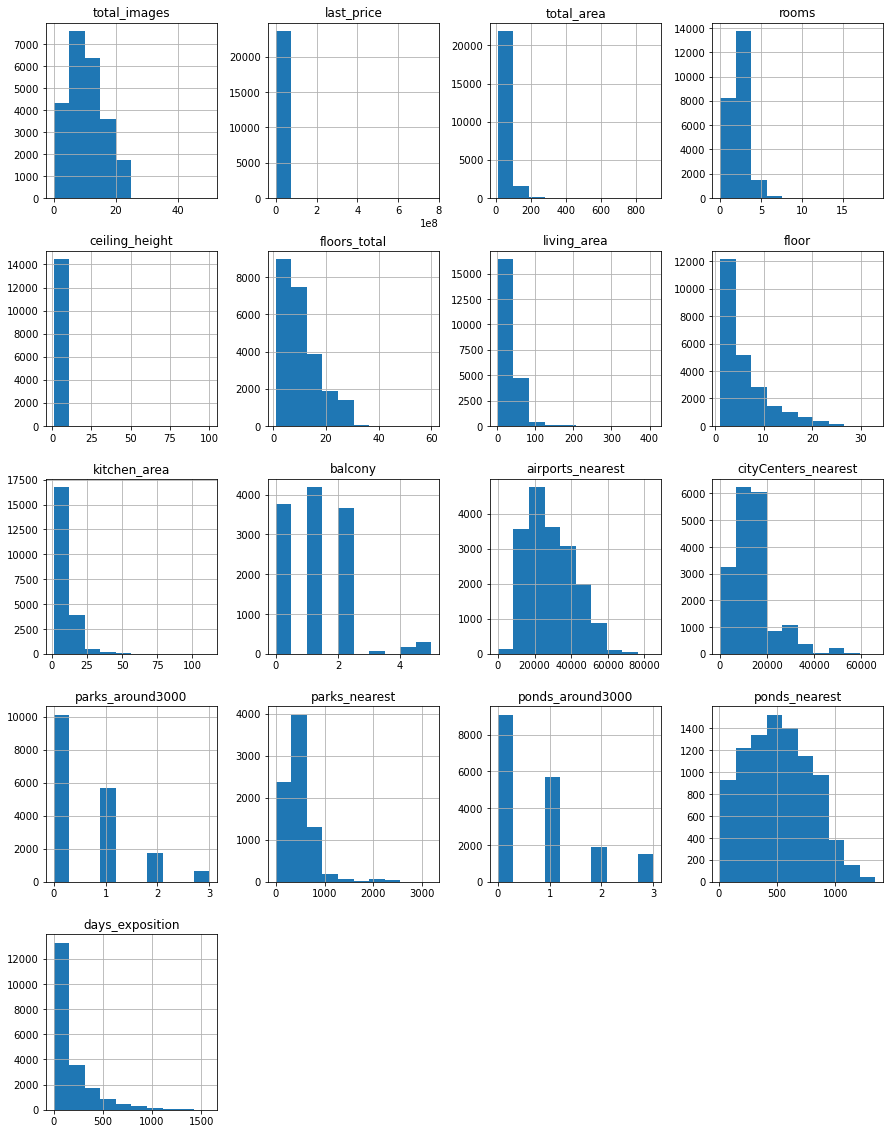

In [4]:
data.hist(figsize=(15, 20)) #гистограмма для каждого столбца таблицы data
plt.show() #отобразить гистограммы 

Данные представлены 23699 строками. 

*Описание данных:*
* 		airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* 		balcony — число балконов
* 		ceiling_height — высота потолков (м)
* 		cityCenters_nearest — расстояние до центра города (м)
* 		days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* 		first_day_exposition — дата публикации
* 		floor — этаж
* 		floors_total — всего этажей в доме
* 		is_apartment — апартаменты (булев тип)
* 		kitchen_area — площадь кухни в квадратных метрах (м²)
* 		last_price — цена на момент снятия с публикации
* 		living_area — жилая площадь в квадратных метрах (м²)
* 		locality_name — название населённого пункта
* 		open_plan — свободная планировка (булев тип)
* 		parks_around3000 — число парков в радиусе 3 км
* 		parks_nearest — расстояние до ближайшего парка (м)
* 		ponds_around3000 — число водоёмов в радиусе 3 км
* 		ponds_nearest — расстояние до ближайшего водоёма (м)
* 		rooms — число комнат
* 		studio — квартира-студия (булев тип)
* 		total_area — общая площадь квартиры в квадратных метрах (м²)
* 		total_images — число фотографий квартиры в объявлении

На основее более детального анализа данных во 2 части проекта, будет требоваться обработка пропусков данных, где применимо, а также корректировка типов данных. 

## Шаг 2.  Предобработка данных

Определим, в каких стоблцах есть пропуски. 

In [5]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**1. balcony**

Заменим пропуски в столбце с информацией о балконе на "0", так как пропуск означает отсуствие балкона. Возможная причина пропусков - "человеческий фактор", люди не заполняли данные, подразумевая, что их нет. 

In [6]:
try:
    data['balcony'] = data['balcony'].fillna(0)
except:
    print('Не удалось заменить пропуски')

Проверим, что есть ли в этом столбце аномальные значения.

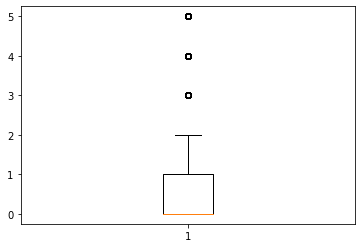

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(data['balcony'])
plt.show()

Максимальное количество балконов - 5, что можем не считать аномальным значением, удалять строки не будем. 

Здесь некорректный тип данных, значения должны быть int, так как эти данные представлены целыми числами.

In [8]:
data['balcony']=data['balcony'].astype(int)

**2. ceiling_height** 


Пустые значения заменим медианой. Возможная причина пропусков - опять же "человеческий фактор" - люди могут не считать этот параметр важным для заполнения или просто не знать его.

In [9]:
try:
    data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
except:
    print('Не удалось заменить пропуски')

Посмотрим максимальное и минимальное значения, а так же квартильные значения, чтобы понять, есть ли некорректные данные этом столбце.
Разброс данных большой, поэтому диаграма размаха будет непоказательной.

In [10]:
print(data['ceiling_height'].quantile([0.25,0.5,0.75]))

print(data['ceiling_height'].max())
print(data['ceiling_height'].min())

0.25    2.60
0.50    2.65
0.75    2.70
Name: ceiling_height, dtype: float64
100.0
1.0


Удалим строки с явно некорректными значениями.

Потолки выше 5.0 и ниже 2.0 уже могут отражать некорректные данные. Посчитаем, какое количество строк данных с такими потолками, чтобы убедиться, что данная доля несущетсвенна от всего датасета и мы можем принять все, что выше этого значения "вбросами" и удалить из датасета для дальнейшей работы.  

In [11]:
data.query('ceiling_height>5.0').count()

total_images            36
last_price              36
total_area              36
first_day_exposition    36
rooms                   36
ceiling_height          36
floors_total            36
living_area             34
floor                   36
is_apartment            13
studio                  36
open_plan               36
kitchen_area            27
balcony                 36
locality_name           36
airports_nearest        26
cityCenters_nearest     26
parks_around3000        26
parks_nearest           15
ponds_around3000        26
ponds_nearest           15
days_exposition         28
dtype: int64

In [12]:
data.query('ceiling_height<2.0').count()

total_images            3
last_price              3
total_area              3
first_day_exposition    3
rooms                   3
ceiling_height          3
floors_total            3
living_area             3
floor                   3
is_apartment            0
studio                  3
open_plan               3
kitchen_area            3
balcony                 3
locality_name           3
airports_nearest        2
cityCenters_nearest     2
parks_around3000        2
parks_nearest           1
ponds_around3000        2
ponds_nearest           2
days_exposition         3
dtype: int64

Всего 39 строк с такими данными из 23699, поэтому создадим выборку без учета этих строк для избежания смещения медианы. 

In [13]:
try:
    data = data.loc[(data['ceiling_height'] <= 5.0) & (data['ceiling_height'] >= 2.0)]
except:
    print('Не получилось удалить')

In [14]:
# код ревьюера

data.shape[0] / 23699

0.9983543609434997

**3. floors_total** 

Незаполненные ячейки floors_total мы не можем заполнить самостоятельно, учитывая, что их доля от общего количества строк несущественна, то удалим их. Вероятной причиной пропуска может быть "человеческий фактор" - люди просто не заполнили это поле, так как эта информация может казаться им несущественной.

In [15]:
try:
    data = data.dropna(subset = ['floors_total'])
except:
    print('Не удалось удалить')

Также здесь некорректный тип данных, значения должны быть int, так как эти данные представлены целыми числами. 

In [16]:
data['floors_total']=data['floors_total'].astype(int)

Посмотрим разброс значений по этажности. 

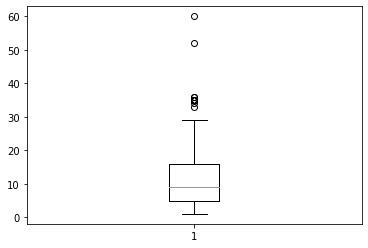

In [17]:
plt.boxplot(data['floors_total'])
plt.show()

Выбивающихся данных, которые необъяснимы, нет. Количество этажей адекватное, удалять ничего не будем. 

**4. living_area**


Пропуски в данном столбце можем заполнить произведением общей площади на коэффициент, оражающий отношение площади жилой комнаты к общей площади. Причина пропусков - не заполнены данные, возможно, большинство считает обязательным указывать общую площадь, а разбивку по комнатам дополнительной необязательной информацией. 

Вычисляем среднее отношение площади жилой к общей, это будет наш коэффициент площади кухни:

In [18]:
coef_la = (data['living_area']/data['total_area']).mean() #считаем среднее отношение жилой площади к общей на основании предоставленных данных
print(coef_la)

0.5648749425649934


Заменим пропуски с учетом полученного коэффициента:

In [19]:
try:
    data['living_area'] = data['living_area'].fillna(data['total_area']*coef_la)
except:
    print('Не удалось заменить пропуски')

Проверим на наличие неадекватных значений

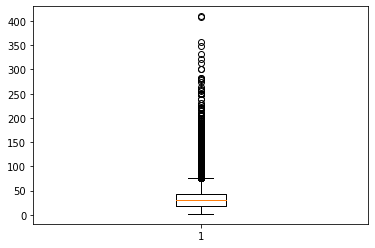

In [20]:
plt.boxplot(data['living_area'])
plt.show()

В целом, действительно есть квартиры с большой площадью, что соответсттвует реальности, поэтому данные удалять не будем. 

**5. is_apartment**

Пропуск не влияет на работу с информацией в датасете, можем оставить его незаполненным. По этой же причине будем приводить его в тип bool. Причиной пропуска в данных может быть в том числе и техническая ошибка в выгруке данных, если это поле не заполнялось пользователями вручную. А также и простой человеческий фактор - не все люди знают, относится ли их квартира к апартаментам или нет.

**6. kitchen_area**

Пропуск в kitchen_area можем произведением общей площади на коэффициент, оражающий отношение площади кухни к общей площади. Причины пропуска, полагаю, аналогичны living_area.

Вычисляем среднее отношение площади кухни к общей, это будет наш коэффициент площади кухни:

In [21]:
coef_ka = (data['kitchen_area']/data['total_area']).mean()
print(coef_ka)

0.1873397710382933


In [22]:
try:
    data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*coef_ka)
except:
    print('Не удалось заменить пропуски')

In [23]:
# код ревьюера
data[data['kitchen_area'] + data['living_area'] > data['total_area']].shape[0]


120

Проверим наличие выбивающихся значений. 

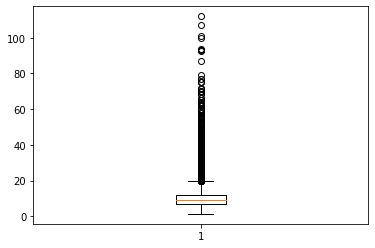

In [24]:
plt.boxplot(data['kitchen_area'])
plt.show()

In [25]:
display(data['kitchen_area'].max())

112.0

Учитывая, что у нас есть большие квартиры, большие кухни не являются неадекватными значениями, поэтому их тоже оставим в выборке. 

**7. locality_name**

Пропуск locality_name в 14 строках не является существенным, поэтому исключим эти строки из датасета. Причина пропусков - техническая ошибка выгрузки данных, так как полагаю, данное поле должно быть обязательным к заполнению пользователем при размещении объявления.  

In [26]:
try:
    data = data.dropna(subset = ['locality_name'])
except:
    print('Не удалось удалить')

В этом столбце много неявных дубликатов, уберем их путем ислкючения потовряющихся слов в названиях. 

In [27]:
for s in ['поселок городского типа ', 'посёлок городского типа ', 'городской поселок ', 'городской посёлок ', 'посёлок ', 'поселок ', 'деревня ', 'село ']:
     data['locality_name'] = data['locality_name'].str.replace(s, '')

data['locality_name'].sort_values().unique()        

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёв

**8.cityCenters_nearest**

Пропуски в расстоянии до центра - картографические данные, причиной пропусков наверняка является техническая ошибка выгрузки.


Для многих населенных пунктов совсем нет данных про cityCenters_nearest и медиану расчитать нельзя. Заполнять пропуски не будем.

**9. days_exposition, airports_nearest, parks_nearest, parks_around3000, ponds_nearest, ponds_around3000.**

Пропуски в этих переменных не влияют на дальнейшую работу с датасетом, а также мы не можем заполнить их на основании имющихся данных.Так как это кратографические данные, то причиной пропуска наверняка является техническая ошибка выгрузки.

Что касатеся days_exposition - это не картографические данные, но причиной также, вероятно, может быть ошибка выгрузки, так как эти данные не заполняются пользоватлем. 

**9.first_day_exposition, last_price**

Скорректируем тип данных в этих столбцах.

В столбце first_day_exposition тип данных "object", нам необходимо перевести его в формат даты, чтобы со значениями можно было проводить операции.  Например, далее в задании необходимо будет определить день недели. 

Столбец last_price тоже переведем в целое значение для удобства работы и округления в дальнейшем. 

In [28]:
import warnings
warnings.filterwarnings('ignore')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')

In [29]:
data['last_price'] = data['last_price'].astype('int')

Переведем цену в тыс.руб. для дальнейшей удобной работы и визуализации.

In [30]:
data['last_price'] = data['last_price']/1000

Проверим, что все пропуски, которые мы планировали убрать, учтены. 

In [31]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20779
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5513
cityCenters_nearest      5490
parks_around3000         5489
parks_nearest           15512
ponds_around3000         5489
ponds_nearest           14507
days_exposition          3163
dtype: int64


Мы убрали пропуски в следующих данных: balcony, ceiling_height, living_area, kitchen_area, locality_name на основании имеющихся данных.


Пропуски в остальных данных невозможно самостоятельно адекватно заполнить, они не влияют на дальнейшую работу над проектом, изменять их не будем.  

Убедимся, что все типы данных теперь отражены верно:

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23526 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23526 non-null  int64         
 1   last_price            23526 non-null  float64       
 2   total_area            23526 non-null  float64       
 3   first_day_exposition  23526 non-null  datetime64[ns]
 4   rooms                 23526 non-null  int64         
 5   ceiling_height        23526 non-null  float64       
 6   floors_total          23526 non-null  int64         
 7   living_area           23526 non-null  float64       
 8   floor                 23526 non-null  int64         
 9   is_apartment          2747 non-null   object        
 10  studio                23526 non-null  bool          
 11  open_plan             23526 non-null  bool          
 12  kitchen_area          23526 non-null  float64       
 13  balcony         

Изменили тип данных у следующих переменных:

first_day_exposition - перевели в дату для дальнейшей работы с определением дня, месяца и года размещения 

rooms, floors_total и last_price - перевели в int, так как эти значения должны отражать целые числа. 

## Шаг 3. Посчитайте и добавьте в таблицу новые столбцы

**1. Добавим цену одного квадратного метра.**

In [33]:
data['price_per_area'] = (data['last_price'] / data['total_area']).round(2).astype(int)

In [34]:
print(data['price_per_area'])

0        120
1         82
2         92
3        408
4        100
        ... 
23694     72
23695     52
23696     44
23697    149
23698     41
Name: price_per_area, Length: 23526, dtype: int64


**2. Добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [35]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [36]:
print(data['weekday_exposition'])

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_exposition, Length: 23526, dtype: int64


**3.Добавим месяц публикации объявления**

In [37]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [38]:
print(data['month_exposition'])

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exposition, Length: 23526, dtype: int64


**4. Добавим год публикации объявления**

In [39]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [40]:
print(data['year_exposition'])

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exposition, Length: 23526, dtype: int64


**5. Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

Напишем функцию, которая будет сравнивать этаж с 1 и максимальным в строке, чтобы вывести "первый" и "последний", в остальных случаях будетзаписывать "другой".

In [41]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else: 
        return 'другой'

Добавим столбец с floor_category с использованием функции выше. 

In [42]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [43]:
print(data['floor_category'])

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 23526, dtype: object


**6. Добавим расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [44]:
data['city_centers_nearest_km'] = (data['cityCenters_nearest']  / 1000).round(0)

In [45]:
print(data['city_centers_nearest_km'])

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_centers_nearest_km, Length: 23526, dtype: float64


## Шаг 4. Проведите исследовательский анализ данных

**1. Жилая площадь**

In [46]:
data['total_area'].describe()

count    23526.000000
mean        60.290821
std         35.530347
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

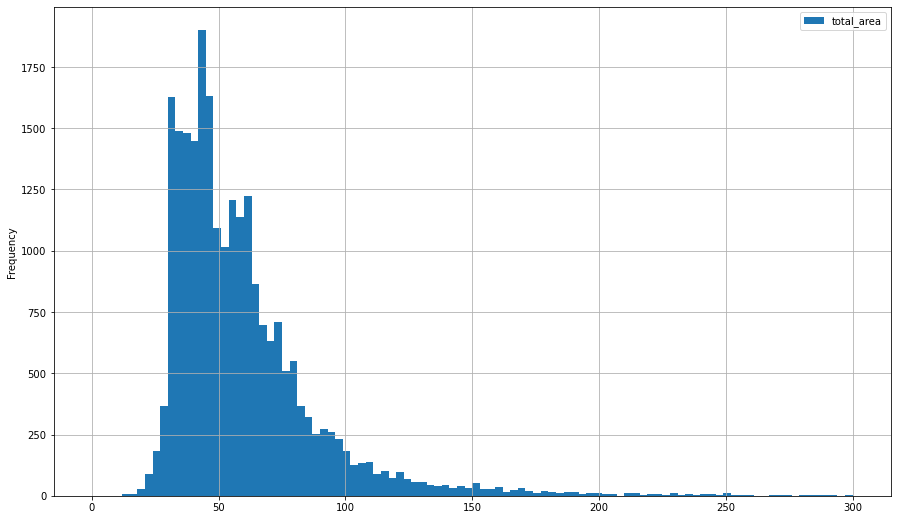

In [47]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,300))
plt.show()

В среднем большая часть продаваемых квартир примерно от 30 до 70 кв.м.. Квартиры с площадью выше 300 кв.м. - редкость, поэтому мы построили график до 300 для наглядности информации о самых популярных квартирах для продажи.

**2. Жилая площадь**

In [48]:
data['living_area'].describe()

count    23526.000000
mean        34.537495
std         22.270618
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

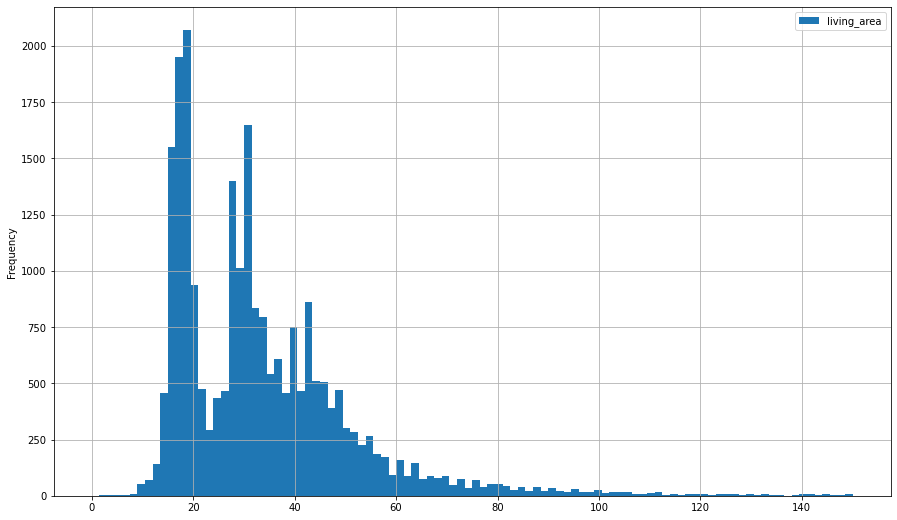

In [49]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,150))
plt.show()

В среднем жилая площадь большей части продаваемых квартир примерно от 20 до 45 кв.м.. Квартиры с жалой площадью сыше 60 кв.м. - редкость.

**3. Площадь кухни**

In [50]:
data['kitchen_area'].describe()

count    23526.000000
mean        10.561215
std          6.071567
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

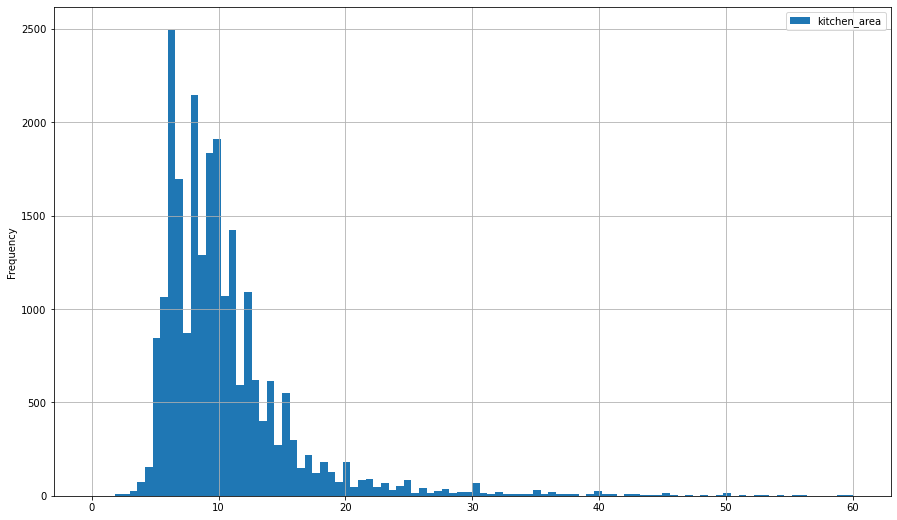

In [51]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,60))
plt.show()

В среднем площадь кухни большей части продаваемых квартир примерно от 7 до 12 кв.м.. Квартиры с площадью кухни сыше 20 кв.м. - редкость.

**4. Цена объекта**

In [52]:
data['last_price'].describe()

count     23526.000000
mean       6525.267912
std       10837.014177
min          12.190000
25%        3400.000000
50%        4646.500000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

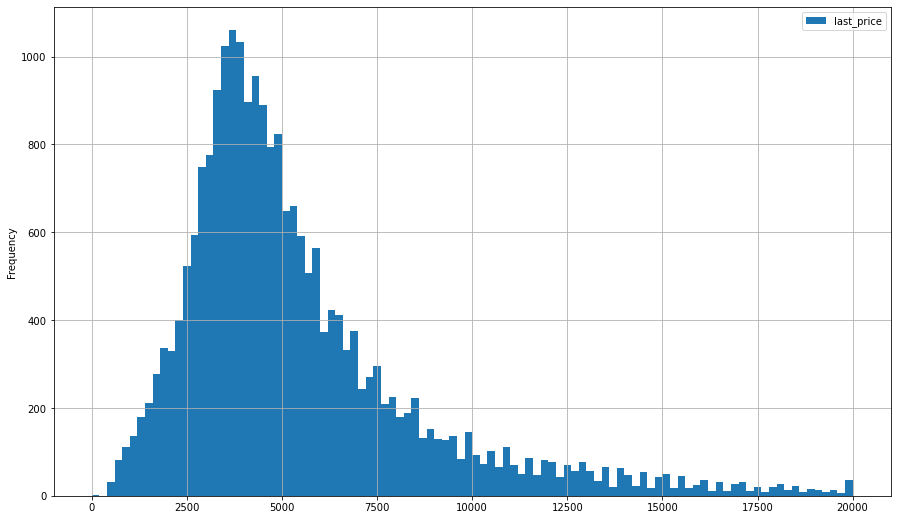

In [53]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,20000))
plt.show()

В среднем стоимость большей части продаваемых квартир примерно от 3,5 млн. руб. до 7 млн.руб. Квартиры с стоимостью выше 15 млн.руб. - редкость.

**5. Количество комнат**

In [54]:
data['rooms'].describe()

count    23526.000000
mean         2.070560
std          1.078174
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

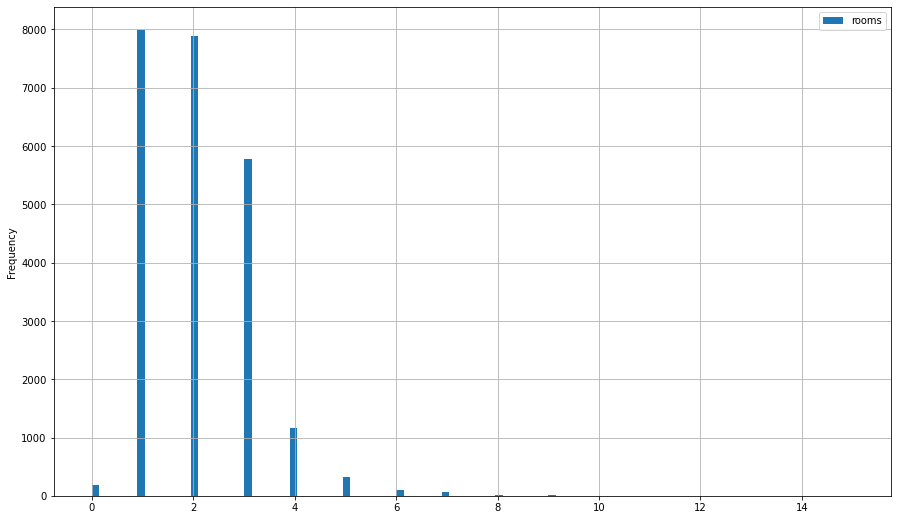

In [55]:
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,15))
plt.show()

Самые популярные для продажи квратиры - 1 -3 комнатные. Квартиры больше 5 комнат - совсем редкость. 

**6. Высота потолков**

In [56]:
data['ceiling_height'].describe()

count    23526.000000
mean         2.696132
std          0.215944
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

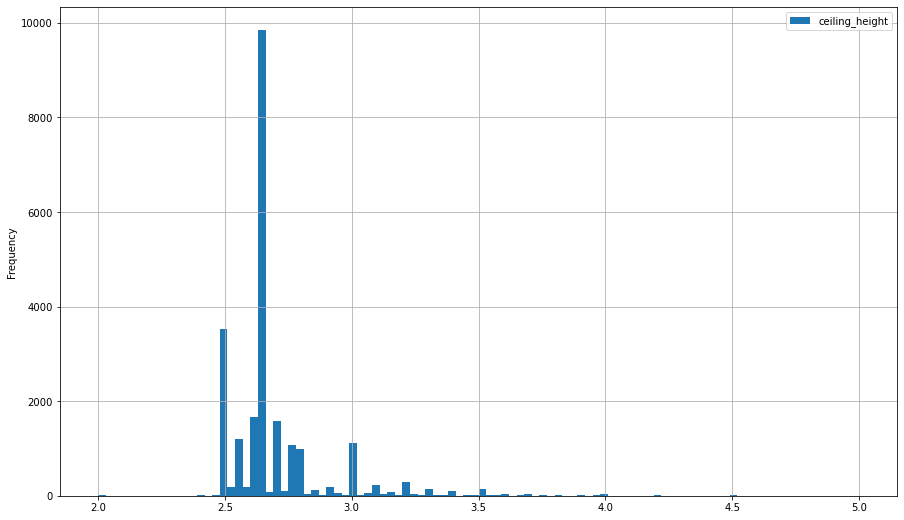

In [57]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (2,5))
plt.show()

Высота потолков 2.7м в большей части продаваемых квратир, что соотвествует санпину (не мене 2.5м). 

**7. Этаж квартиры**

In [58]:
data['floor'].describe()

count    23526.000000
mean         5.878687
std          4.871735
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

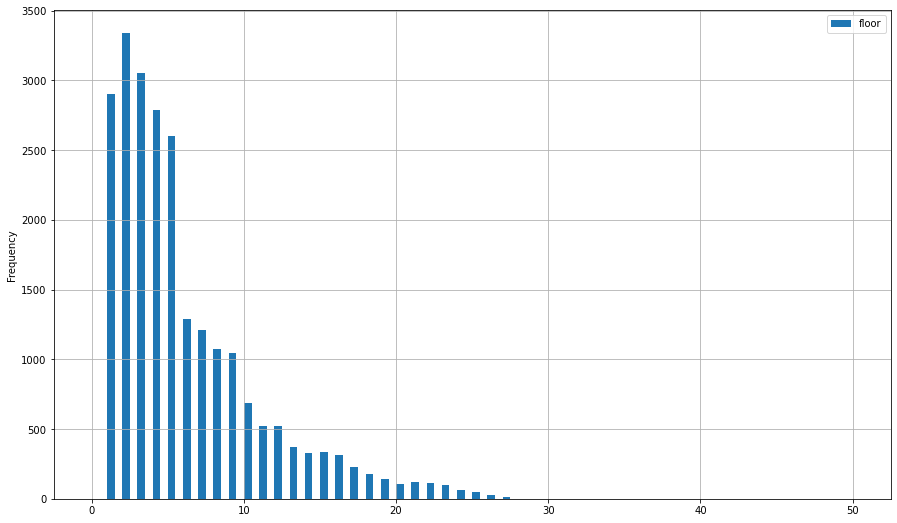

In [59]:
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,50))
plt.show()

Большая часть продающихся квартир находится со 2 по 7 этаж. Квартиры выше 20 этажа - становятся совсем редкостью. 

**8. Тип этажа квартиры («первый», «последний», «другой»)**

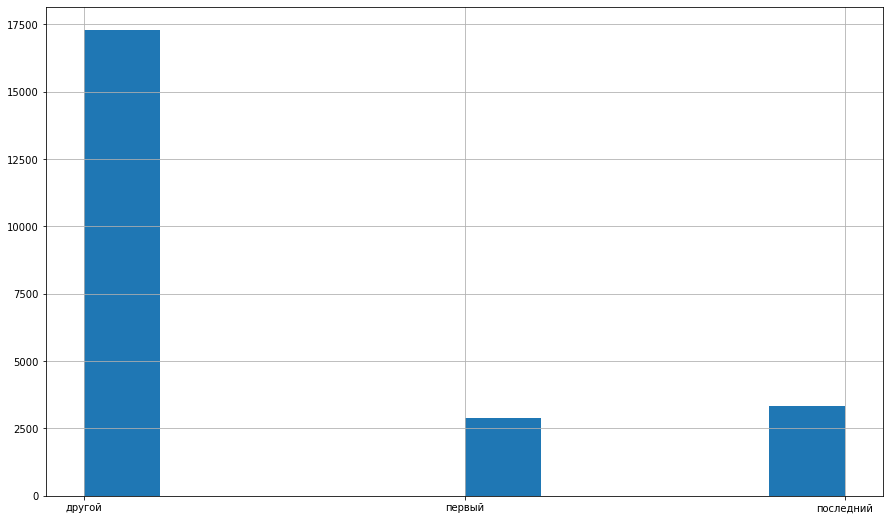

In [60]:
data['floor_category'].hist(figsize = (15,9))
plt.show()


Первые и последние этажи не пользуются популярностью у покупателей квартир. Большая часть проданных квартир приходится на другие этажи. 

**9.Общее количество этажей в доме**

In [61]:
data['floors_total'].describe()

count    23526.000000
mean        10.677718
std          6.591240
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

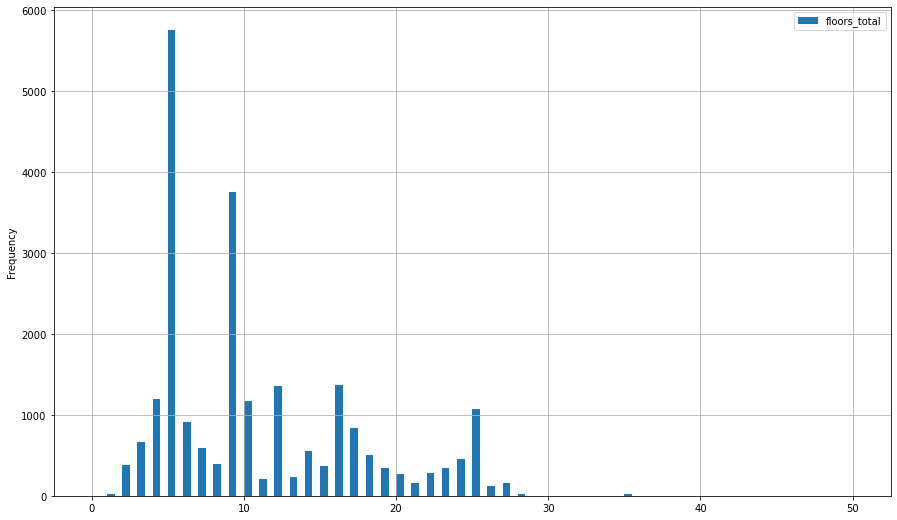

In [62]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,50))
plt.show()

В среднем количество этажей в домах с проданными квартрами варьируется от 5 до 14 этажей. 

**10. Расстояние до центра города в метрах**

In [63]:
data['cityCenters_nearest'].describe()

count    18036.000000
mean     14195.897206
std       8611.636704
min        181.000000
25%       9240.250000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

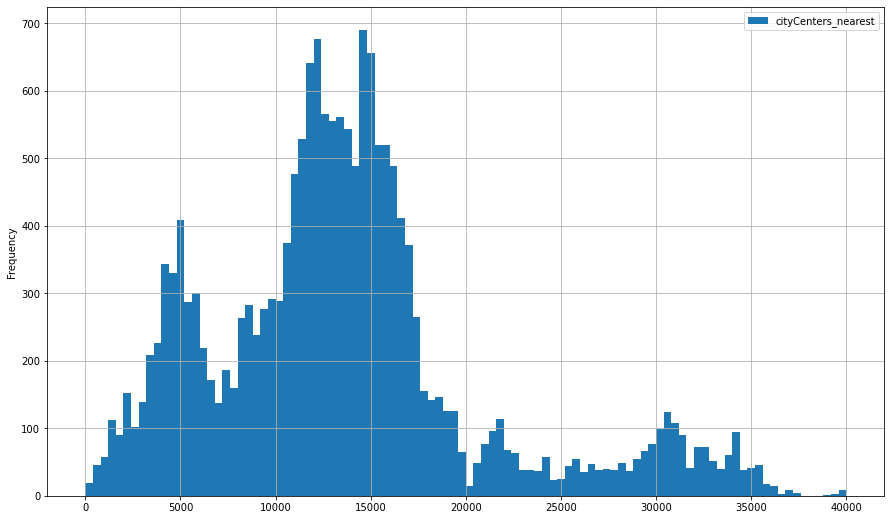

In [64]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,40000))
plt.show()

Расстояние большей части проданных квартир до центра города составляет от 10 до 15 км. 

**11.Расстояние до ближайшего аэропорта**

In [65]:
data['airports_nearest'].describe()

count    18013.000000
mean     28800.723977
std      12633.800534
min          0.000000
25%      18557.000000
50%      26757.000000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

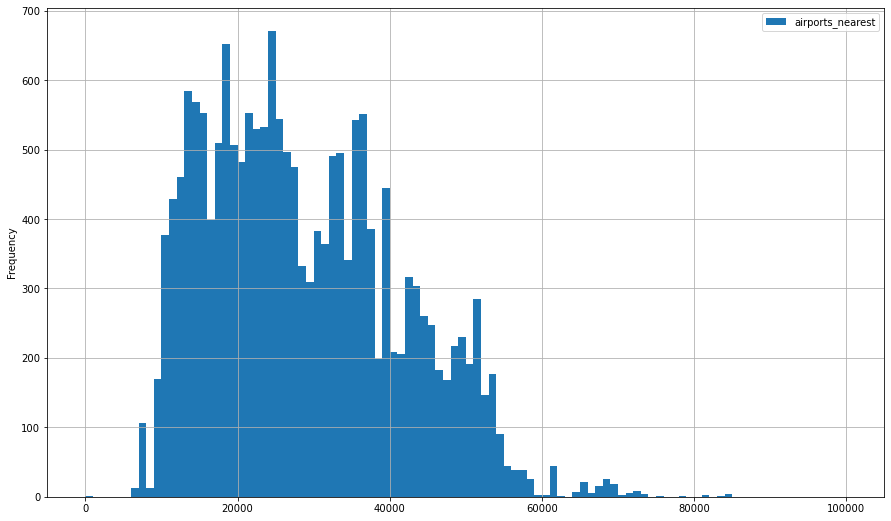

In [66]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,100000))
plt.show()

Расстояние большей части проданных квартир до аэропорта составляет от 18 до 40 км. 

**12.Расстояние до ближайшего парка**

In [67]:
data['parks_nearest'].describe()

count    8014.000000
mean      490.678687
std       341.782230
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

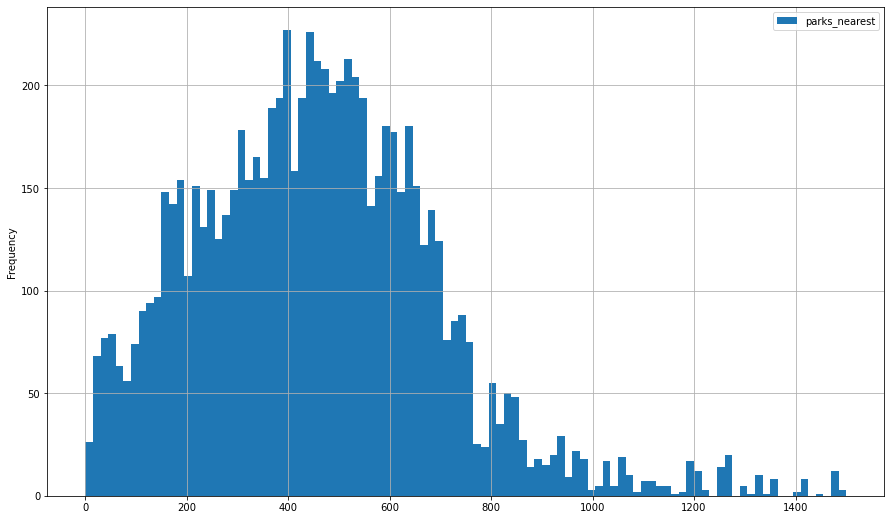

In [68]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,1500))
plt.show()

In [69]:
print(((data['parks_nearest'].isna().sum())/(data['total_area'].count())*100).round(1))

65.9


Доля квартир, у которых отражено наличие парка составляет почти 66%, что не учитывает по сути почти четверть выборки. 

Расстояние большей части таких квартир до блжайшего парка составляет от 250 до 600 м. 

**13.День и месяц публикации объявления**

In [70]:
data[['weekday_exposition','month_exposition']].describe()

,weekday_exposition,month_exposition
count,23526.000000,23526.000000
mean,2.567712,6.401556
std,1.788589,3.493060
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


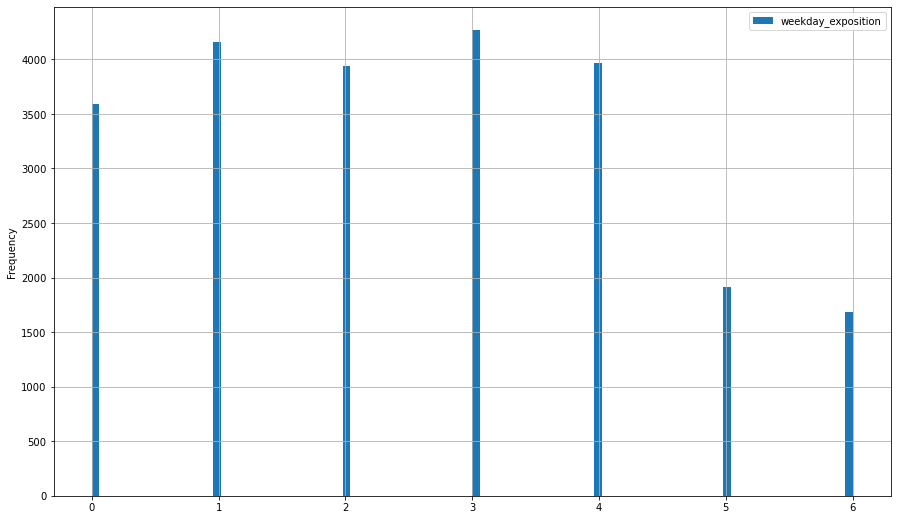

In [71]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,6))
plt.show()

Большая часть объявлений размещается в будние дни с понедельника по пятницу. В выходные количество размещенных объявлений существенно ниже.

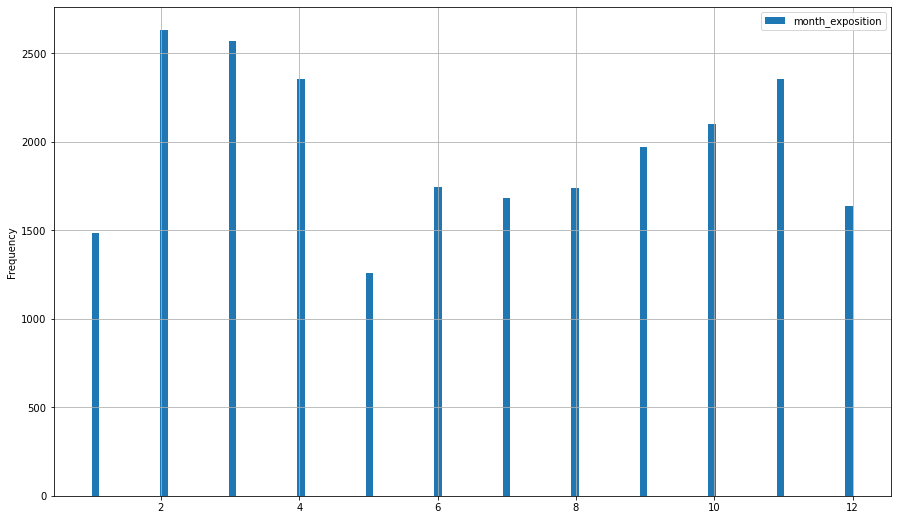

In [72]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (1,12))
plt.show()

Самые популярные месяцы для размещения объявлений - период с февраля по апрель. В мае меньшее количество дней в совокупности с падением активности на рынке недвижимости дает "провал", в целом в течение лета ближе к осени динамика размещения объявлений о продаже квартир возрастает. 

**14. Как быстро продавались квартиры**

In [73]:
data['days_exposition'].describe()

count    20363.000000
mean       180.734911
std        219.764568
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

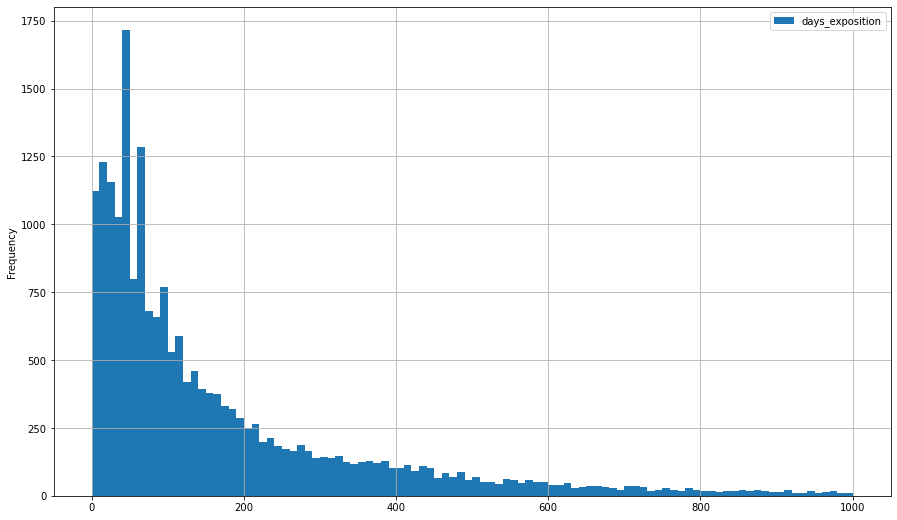

In [74]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,9), range = (0,1000))
plt.show()

In [75]:
data['days_exposition'].describe()

count    20363.000000
mean       180.734911
std        219.764568
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартира продается около 3 месяцев (примерно 100 дней). 
Есть квартиры, окторые продаются больше 2 лет, что может соответствовать каким-то нестандартным и большим варинатам, либо неперспективным расположениям, а также и простой ошибке в части несвоевременного закрытия сделки на портале.

Быстрой продажей можно считать продажи со сроками меньше 45 дней, долгой продажей считается продажа со сроками свыше 230 дней. 

**15. Зависимость цены:**

*15.1 от общей площади*

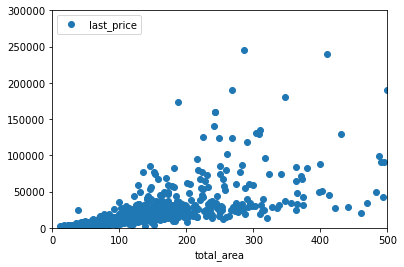

In [76]:
data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')\
    .plot(style='o',xlim=(0,500), ylim = (0,300000))
plt.show()

На графике мы видим зависимость цены от общей площади, особо явно она выражена в квартирах, площадью до 250 кв.м. По ценам на квартиры площадью свыше 250 кв.м. корреляция становится не такой явной, так как типы объектов становятся нестандартными и на них могут влиять разные факторы. 

*15.2 от жилой площади*

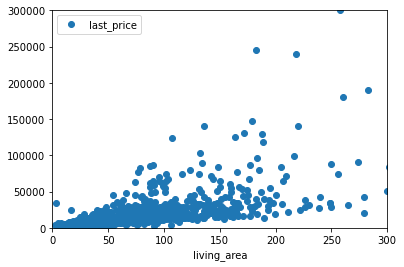

In [77]:
data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')\
    .plot(style='o',xlim=(0,300), ylim = (0,300000))
plt.show()

Аналогично как и по общей площади, на графике мы видим зависимость цены от жилой площади, особо явно она также выражена в квартирах, где жилая площадь до 200 кв.м.По ценам на квартиры с жилой площадью свыше 200 кв.м. корреляция становится не такой явной, так как типы объектов становятся нестандартными и на них могут влиять разные факторы.

*15.3 от площади кухни*

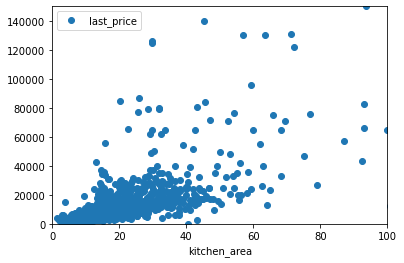

In [78]:
data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')\
    .plot(style='o',xlim=(0,100), ylim = (0,150000))
plt.show()

Данные подтверждаются как и по предыдущим графикам зависимости цены от плоащади - в квартирах с кухней до 40 кв.м. мы видим сильную зависимость, все, что выше - становится нестандартным и зависимость снижается.

*15.4 от количества комнат*

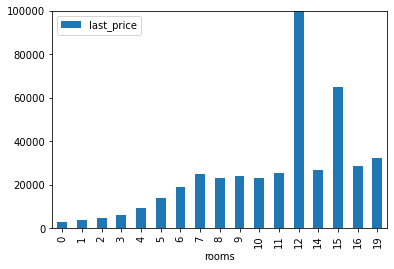

In [79]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')\
    .plot(kind='bar', style='o',xlim=(0,18), ylim=(0,100000))
plt.show()

Мы видим тенденцию, что зависимость есть, чем больше комнат, тем выше цена. При этом для квартир с комнатностью выше 6 - зависимоть уже не такая линейная. 

*15.5 от этажа*

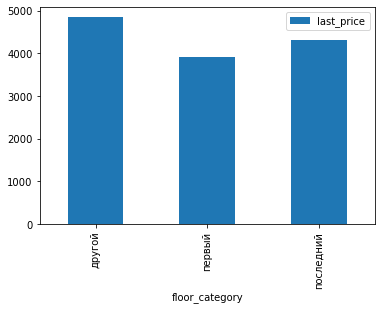

In [80]:
data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')\
    .plot(kind='bar', style='o-')
plt.show()

Сильной зависимости цены от этажа практически нет. Первый этаж в среднем будет самым дешевым, остальные подороже. 

*15.6 от даты размещения (день недели, месяц, год)*

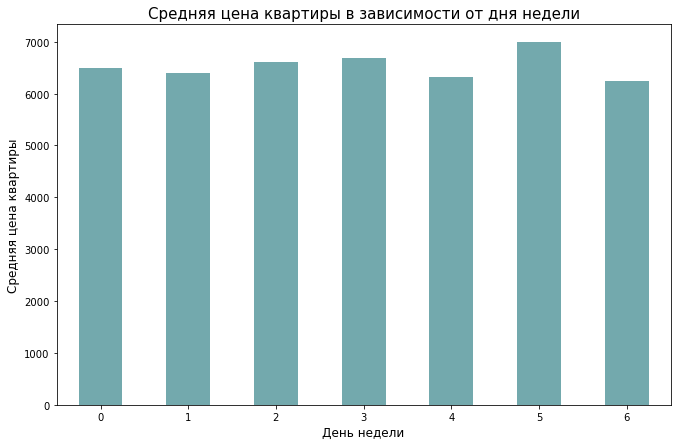

In [81]:
data.groupby('weekday_exposition')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от дня недели', size=15)
plt.xlabel('День недели', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

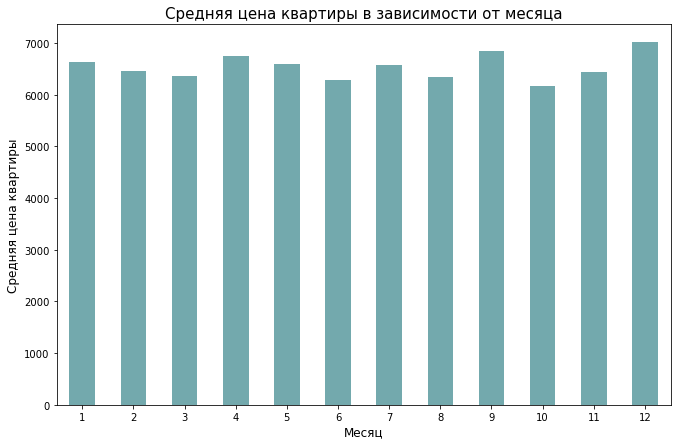

In [82]:
data.groupby('month_exposition')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от месяца', size=15)
plt.xlabel('Месяц', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

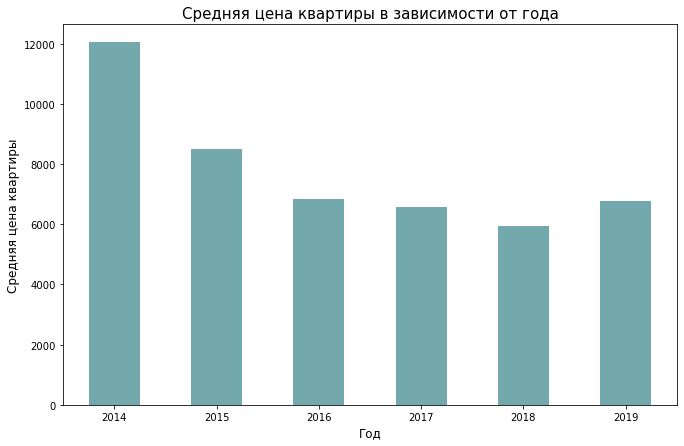

In [83]:
data.groupby('year_exposition')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от года', size=15)
plt.xlabel('Год', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

Существенной зависимости цены от дня недели и месяца не выявлено (есть небольшое снижение цен летом, что может быть связано с более низкой покупательской активностью), а вот зависимость от года выглядит существенной, что объяснимо: после кризиса в 2014 году, покупательская способность снизилась, соответственно, предложения на рынке скорректировались по цене.

**16. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [84]:
data.groupby('locality_name').agg({'total_images':'count', 'price_per_area':'mean'})\
                    .rename(columns = {'total_images':'Число объявлений'})\
                    .sort_values(by='Число объявлений', ascending=False).head(10)

,Число объявлений,price_per_area
locality_name,,
Санкт-Петербург,15625,114.303168
Мурино,584,85.541096
Кудрово,470,94.770213
Шушары,439,78.054670
Всеволожск,398,68.185930
Пушкин,369,102.658537
Колпино,338,74.955621
Парголово,327,89.737003
Гатчина,306,68.277778


Большая часть объявлений размещена в Санкт-Петербурге с максимальной средней ценой за кв.м. Цена за кв.м. в Пушкине не существенно ниже цены СПб, так как этот город находится очень близко к СПб и считается хорошим местом с большим количеством парков. Кудрово находится внутри КАД и там даже есть метро, что определяет его высокую цену, но наличие сложностей с автомобильной транспортной развязкой и отсутствие парков, делает его немного дешевле Пушкина. В остальных городах цена существенно ниже, в том числе по мере удаления города и его размеров. Самая низкая цена среди представленных населенных пунктов в Выборге.

**17. Cредняя цена каждого километра до центра СПб.**

In [85]:
spb = data.query('locality_name=="Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values = 'price_per_area', aggfunc='median')
display(spb)


,price_per_area
city_centers_nearest_km,
0.0,172.0
1.0,128.0
2.0,122.5
3.0,108.0
4.0,118.0
5.0,126.0
6.0,131.0
7.0,126.0
8.0,122.0


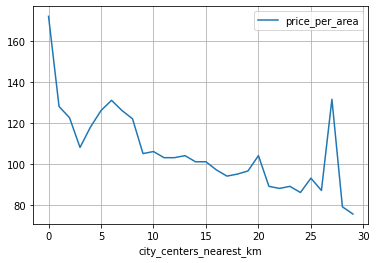

In [86]:
spb.plot(grid = True)
plt.show()

Данные отображают логичную тенденцию - чем дальше от центра, тем цена за квадратный метр ниже. 

Резкий скачок на 27 км может отображать элитные районы в пригороде Санкт-Петербурга такие как Сестрорецк, которые в таблице были отнесены к Санкт-Петербургу. 

Снижение средней цены на 3 км может отражать районы, которые близки к центру, но считаются дешевыми из-за своей слабой инфраструктуры (например, за набережной обводного канала). 

## Шаг 5. Общий вывод

В рамках проекта были предоставлены данные из сервиса Яндекс.Недвижимость о продаже недвижимости за период с 2014 по 2019 год.

*Общая информация о предоставленных данных:*
1. Большая часть продаваемых квартир имеет площадь от 30 до 70 кв.м., комнатностью от 1 до 3. 
2. Высота потолков большей чаэтипроданных квартир составляет в среднем 2.7.м, что говорит о том, что они  не относятся к старому фонду Санкт-Петербурга.
3. Средняя цена большей части продаваемых кватир назодится в пределах от 3,5 млн.руб. До 7 млн.руб.
4. Самые популярные этажи для продажи - со 2 по 7, при этом цены на квартиры первого этажа были самыми низкими, но не существенно отличались от цен последнего этажа. 
5. Большая часть квартир расположена в радиусе до 15 км от цента, имеет аэропорт в пределах 40км, и парк в пределах 600м. 
6. Популярные дни размещения объявлений - будние дни. Касаемо сезонности - пик размещения приходится на февраль - апрель со снижением активности к лету и восстановлением ее к осени. В декабре количество объявлений снижается в связи со смещением фокуса у людей на новогодние праздники. 
7. Средняя скорость продажи квартиры - около 3 месяцев.


*Были исследованы факторы, которые оказывают влияние на стоимость квартир, в результате чего получены следующие наблюдения:*

1. Площадь квартиры (как и жилая/кухонная площадь соответственно) существенно влияет на ее стоимость, при этом чем больше площадь, тем эта зависимость становится менее явной, так как на нестандартные помещения по площади могут влиять ранее факторы (например, назначение помещения, наличие в этом помещении заключенных долгосрочных арендных контрактов, его местоположение и прочее).
2. Зависимость цены от комнат также есть, но как и с площадью, чем более количество комнат, тем зависимость становится не такой существенной. 
3. Этаж влияет на стоимость квартиры преимущественно с точки зрения первого и последнего этажа - эти квартиры среднестатистически стоят дешевле, а все другие - дороже. 
4. Дни недели не оказывают заметного влияния на стоимость. Зависимость мы начинаем наблюдать от месяца размещения, но максимальное влияние оказывает год размещения: в 2014 году был серьезный кризис с последующим сильным снижением покупательской способности, в связи с чем видим негативную динамику стоимость недвижимости. 
5. Средняя цена квадратного метра выше всего в Санкт-Петербурге, в городах области цена заметно ниже. При этом внутри города чем ближе расстояние до центра, тем цена квадратного метра выше. Исключением является поправка на район, который является центром, но при этом из-за своих инфраструктурных характеристик не является ценным. 